<a href="https://colab.research.google.com/github/Kondasagar/EDA-on-Air_bnb-bookings/blob/main/Vidyasagr_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

We have Airbnb data which comprises information about host, neighbourhood, room type, price, reviews and availability. By exploring the data we can come to some conclusions.The steps involved in this process are 
1. loading the data or reading the data
2. cleaning the data
3. Manipulate the data if necessary
4. EDA
5. Conclusions from EDA. 

In [63]:
# importing pandas and numpy libraries

import pandas as pd
import numpy as np

In [64]:
# Importing visualization libraraies

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

**Mounting the google drive.**

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# reading the airbnb dataset
air_bnb=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_projects/Airbnb_eda/Copy of Airbnb NYC 2019.csv')

In [67]:
# finding shape of dataframe
print(f"the shape of given Airbnb dataframe is {air_bnb.shape}  ")

the shape of given Airbnb dataframe is (48895, 16)  


In [68]:
# take look at data types and null values in all features using .info() method
air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [69]:
# First ten rows in original dataframe

air_bnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


**We might need to count the number of NaN values for each feature in the dataset so that we can decide how to deal with it. For example, if the number of missing values is quite low, then we may choose to drop those observations; or there might be a column where a lot of entries are missing, so we can decide whether to include that variable at all.**

In [70]:
# finding null values in different features
air_bnb.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In the **'last_review'** and **'review_per_month'** columns, the number of null values are high, so it is better to drop these two features to go for further analysis.

In [71]:
air_bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [72]:
df=air_bnb[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group','neighbourhood','room_type', 'price','minimum_nights', 'number_of_reviews',
             'calculated_host_listings_count', 'availability_365']]


In [73]:
df.shape

(48895, 12)

In [74]:
# null values in our data frame are
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [75]:
df_1=df.dropna()
df_1.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [76]:
df_1.shape

(48858, 12)

In [77]:
df_1.duplicated().unique()

array([False])

The dataframe df_1 does not have duplicate rows.

In [78]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48858 non-null  int64 
 1   name                            48858 non-null  object
 2   host_id                         48858 non-null  int64 
 3   host_name                       48858 non-null  object
 4   neighbourhood_group             48858 non-null  object
 5   neighbourhood                   48858 non-null  object
 6   room_type                       48858 non-null  object
 7   price                           48858 non-null  int64 
 8   minimum_nights                  48858 non-null  int64 
 9   number_of_reviews               48858 non-null  int64 
 10  calculated_host_listings_count  48858 non-null  int64 
 11  availability_365                48858 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


In [79]:
df_1.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [80]:
# last four rows in new dataframe
df_1.tail(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,Private room,90,7,0,1,23


# 1. What can we learn about different hosts and areas?

In [81]:
len(df_1['host_name'].unique())

11450

Almost 11450 hosts are there throughout ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'].

In [82]:
len(df_1['id'].unique())

48858

the length of unique ids are same as number of rows, which means each row has unique id.

In [83]:
len(df_1['host_id'].unique())

37425

The length of unique host names is different from the length of unique host ids. This means the a host may have different host_id based on location and room type they are providing.

In [84]:
len(df_1['neighbourhood'].unique())

221

Around 221 cities are there in our data set. And these cities divided into five neighbourhood groups.


In [85]:
len(df_1['neighbourhood_group'].unique())

5

In [86]:
df_1['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [87]:
hosts_neigbr_group = df_1.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_neigbr_group.sort_values(by='calculated_host_listings_count', ascending=False).head(10)

,host_name,neighbourhood_group,calculated_host_listings_count
13214,Sonder (NYC),Manhattan,327
1832,Blueground,Brooklyn,232
1833,Blueground,Manhattan,232
7273,Kara,Manhattan,121
7476,Kazuya,Brooklyn,103
7477,Kazuya,Manhattan,103
7478,Kazuya,Queens,103
6538,Jeremy & Laura,Manhattan,96
13213,Sonder,Manhattan,96
2900,Corporate Housing,Manhattan,91


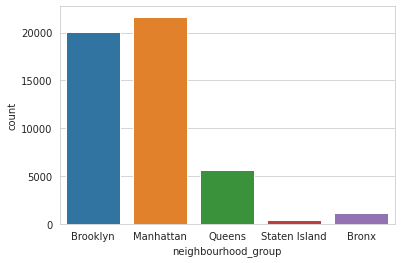

In [88]:
# distict neighbourhood_group are five. So we can get count plot for these 5 categories.
sns.countplot(x='neighbourhood_group',data=df_1) 

## As we can see the most number of entries are from Manhattan followed by Brooklyn, Queens, Bronx and Staten Island. The host named Sonder (NYC) has maximum number of host_listings count.

In [89]:
hosts_neigbr_group = df_1.groupby(['name','host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_neigbr_group.sort_values(by='calculated_host_listings_count', ascending=False).head(10)

,name,host_name,neighbourhood_group,calculated_host_listings_count
38419,Sonder | 180 Water | Pleasant 2BR + Rooftop,Sonder (NYC),Manhattan,327
38492,Sonder | Stock Exchange | Calming 1BR + Sofa Bed,Sonder (NYC),Manhattan,327
38700,Sonder | Wall Street | Quaint Studio + Kitchen,Sonder (NYC),Manhattan,327
38494,Sonder | Stock Exchange | Calming 3BR + Sofa Bed,Sonder (NYC),Manhattan,327
38495,Sonder | Stock Exchange | Central 1BR + Kitchen,Sonder (NYC),Manhattan,327
38496,Sonder | Stock Exchange | Central 1BR + Sofa Bed,Sonder (NYC),Manhattan,327
38497,Sonder | Stock Exchange | Central 2BR + Lounge,Sonder (NYC),Manhattan,327
38498,Sonder | Stock Exchange | Chic 1BR + Kitchen,Sonder (NYC),Manhattan,327
38499,Sonder | Stock Exchange | Chic 1BR + Laundry,Sonder (NYC),Manhattan,327
38500,Sonder | Stock Exchange | Chic 1BR + Sofa Bed,Sonder (NYC),Manhattan,327


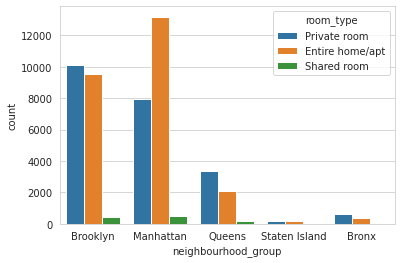

In [90]:
sns.countplot(x='neighbourhood_group',hue='room_type',data=df_1) 

## 1. Broklin: Hosts are proving more number of private rooms than Entire home/apt and shared rooms
## 2. Manhattan: Hosts are providing more number of Entire home/apt than the number of private rooms
## 3. Queens: Hosts are providing more number of private rooms compared to entire home/apt.
## 4. Bronx: Hosts are providing more number of private rooms compared to entire home/apt.
## 5. Staten Island: Hosts are providing more number of private rooms compared to entire home/apt.

## In every neighbour hood group, the percentage of shared rooms are less compared other room types.

In [91]:
# check whether shared room available in staten island
df_1[df_1["neighbourhood_group"]=="Staten Island"]["room_type"].value_counts()

Private room       188
Entire home/apt    176
Shared room          9
Name: room_type, dtype: int64

In [92]:
# check whether shared room available in Bronx or not.
df_1[df_1["neighbourhood_group"]=="Bronx"]["room_type"].value_counts()

Private room       652
Entire home/apt    378
Shared room         59
Name: room_type, dtype: int64

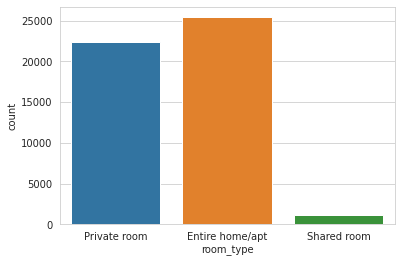

In [93]:
sns.countplot(x='room_type',data=df_1) 

## Compared to shared rooms, the hosts are providing Entire home/apt and private room.

# 2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

Let us know about reviews,prices and neighbourhood locations.

In [94]:
# maximum number of reviews among all entries in every neighbourhood group
neighbourhood_group_reviews = df_1.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
neighbourhood_group_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


Text(0.5, 1.0, ' Max Number of reviews Vs location')

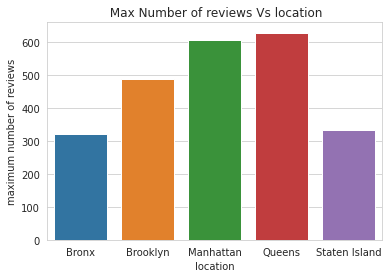

In [95]:
# locations=neighbourhood_group_reviews["neighbourhood_group"]
# max_num_reviews=neighbourhood_group_reviews["number_of_reviews"]
# creating the bar plot
sns.barplot(x="neighbourhood_group",y="number_of_reviews",data=neighbourhood_group_reviews)
 
plt.xlabel("location")
plt.ylabel("maximum number of reviews")
plt.title(" Max Number of reviews Vs location")

In [96]:
price_location = df_1.groupby(['price'])['number_of_reviews'].max().reset_index()
price_location.head()

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


(0.0, 4000.0)

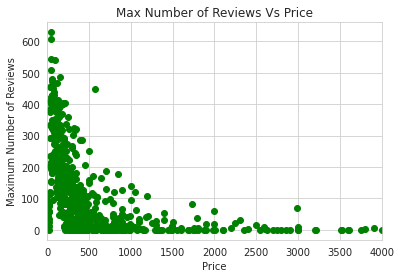

In [97]:
plt.scatter(price_location['price'], price_location['number_of_reviews'], color ='green')

plt.xlabel("Price")
plt.ylabel("Maximum Number of Reviews")
plt.title("Max Number of Reviews Vs Price")
plt.xlim([0, 4000])

Text(0.5, 1.0, 'Max Number of Reviews Vs Price')

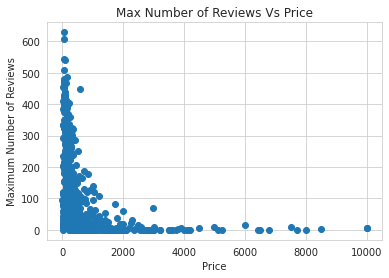

In [98]:
plt.scatter(price_location['price'],price_location['number_of_reviews'])
 
plt.xlabel("Price")
plt.ylabel("Maximum Number of Reviews")
plt.title("Max Number of Reviews Vs Price")

## As we can see, most people prefer low-price lodgings or apartments. And also, people prefer to stay in Queens and, after that, they are preferring to stay in Manhattan.

# 3. Which hosts are the busiest and why?

In [99]:
busiest_hosts = df_1.groupby(['host_name','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,room_type,number_of_reviews
3434,Dona,Private room,629
6332,Jj,Private room,607
8977,Maya,Private room,543
2164,Carol,Private room,540
2975,Danielle,Private room,510
1214,Asa,Entire home/apt,488
13839,Wanda,Private room,480
7902,Linda,Private room,474
2947,Dani,Entire home/apt,467
863,Angela,Private room,466


# The "number_of_reviews" column in the above dataframe is actually the maximum number of reviews for that corresponding host.

We can show above information in bar diagram.

Text(0.5, 1.0, 'max number of reviews Vs host')

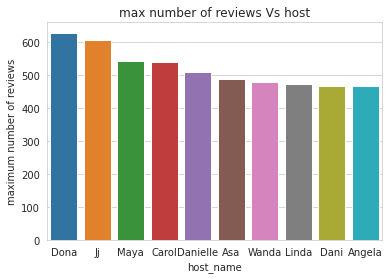

In [100]:
sns.barplot(x = 'host_name',y = 'number_of_reviews',data =busiest_hosts)

plt.ylabel('maximum number of reviews')
plt.title('max number of reviews Vs host')

From the above analysis, the busiest hosts are


1.   Dona
2.   Jj
3.   Maya
4.   Carol
5.   Danielle
6.   Asa
7.   Wanda
8.   Linda
9.   Dani
10.  Angela

Most of the busiest hosts are provide private rooms. As we can see in data frame, have more reviews for private rooms and entire home/apartment. This means people prefer privacy.


In [101]:
busiest_roomtype = df_1.groupby(['room_type'])['number_of_reviews'].max().reset_index()
busiest_roomtype = busiest_roomtype.sort_values(by='number_of_reviews', ascending=False)
busiest_roomtype

,room_type,number_of_reviews
1,Private room,629
0,Entire home/apt,488
2,Shared room,454


## 4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [102]:
traffic_areas = df_1.groupby(['neighbourhood_group','room_type'])['minimum_nights'].max().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,1250
4,Brooklyn,Private room,999
8,Manhattan,Shared room,999
3,Brooklyn,Entire home/apt,500
9,Queens,Entire home/apt,500
1,Bronx,Private room,365
7,Manhattan,Private room,365
10,Queens,Private room,365
12,Staten Island,Entire home/apt,365
0,Bronx,Entire home/apt,186


In [103]:
traffic_ngbr_groups = df_1.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_ngbr_groups = traffic_ngbr_groups.sort_values(by='minimum_nights', ascending=False)
traffic_ngbr_groups

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13190
4,Brooklyn,Private room,10123
3,Brooklyn,Entire home/apt,9553
7,Manhattan,Private room,7973
10,Queens,Private room,3370
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,378


## The count() returns the total number of times a particular combination appeared in the data frame. The locations or neighbourhoods in Manhattan and Brooklyn are more compared to other neighbourhood groups. So the people's traffic/density is more in Manhattan and Brooklyn. The reason behind this is in those two places, hosts are providing more number of private rooms and entire home/apt.

## About availability of rooms:

In [104]:
df_availab=df_1['availability_365'].value_counts()
df_availab

0      17508
365     1294
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

In [105]:
df_1[df_1['neighbourhood_group']=='Manhattan']['availability_365'].value_counts()

0      8088
365     572
364     246
1       190
5       155
       ... 
196      11
183       9
114       9
136       8
202       7
Name: availability_365, Length: 366, dtype: int64

## In Manhattan, around 8088 rooms are not availble throughout the year.

In [106]:
df_1[df_1['neighbourhood_group']=='Brooklyn']['availability_365'].value_counts()

0      7834
365     453
1       164
89      155
364     153
       ... 
186       8
183       7
143       7
203       6
181       5
Name: availability_365, Length: 366, dtype: int64

## In Brooklyn, around 7834 rooms are not available for rent throughout the year.

## Among 48850 rooms in all locations, 17508 rooms are not available for rent throughout the whole year.